# INDEX :- 

**1. Importing Required Libraries**

**2. Loading the Dataset**

**3. Exploratory Data Analysis**

a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value
         
**4. Data Visualization**
####  Here we are going to plot :-
 - Count Plot :- to see if the dataset is balanced or not
 - Histograms :- to see if data is normally distributed or skewed
 - Box Plot :- to analyse the distribution and see the outliers
 - Scatter plots :- to understand relationship between any two variables
 - Pair plot :- to create scatter plot between all the variables
 
**5. Feature Selection**

**6. Handling Outliers**

**7. Split the Data Frame into X and y**

**8. TRAIN TEST SPLIT**

**9. Build the Classification Algorithm**

9.1  KNN

9.2  Naive Bayes

9.3  SVM

9.4  Decision Tree

9.5  Random Forest

9.6  Logistic Regression

#### The models include the following:- 

  a. Hyper Parameter Tuning using GridSearch CV 
  
  b. Fit Best Model
  
  c. Predict on testing data using that model
  
  d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
  

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('dataset/diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.


In [11]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [12]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


NOTE :-
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

In [14]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

<Axes: xlabel='Outcome', ylabel='count'>

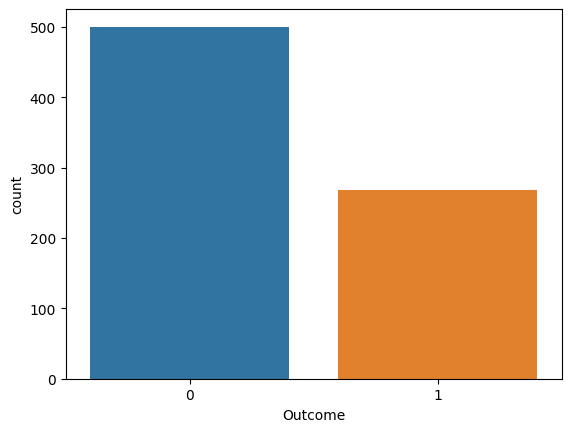

In [15]:
sns.countplot(x='Outcome',data=df)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Training the Model**

In [18]:
classifier = svm.SVC(kernel='linear')

In [19]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

Accuracy Score

In [20]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [22]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [24]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


Saving the trained model

In [25]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [26]:
import pickle

In [27]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [28]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))